In [ ]:
#@title ライブラリのインポート

import cv2
import numpy as np

import matplotlib.pyplot as plt


ライブラリのバージョンの確認方法
```
# OpenCVのバージョン
import cv2
print(f"OpenCV (cv2) バージョン: {cv2.__version__}")

# NumPyのバージョン
import numpy as np
print(f"NumPy バージョン: {np.__version__}")

# Matplotlibのバージョン
import matplotlib
print(f"Matplotlib バージョン: {matplotlib.__version__}")
```

```
OpenCV (cv2) バージョン: 4.10.0
NumPy バージョン: 1.26.4
Matplotlib バージョン: 3.10.0
```

# 画像データの読み込み

下記のURLから画像ファイルをダウンロードしてください。サイズは1280×854にしてください。ダウンロード後、Google Colabにアップロードしてください。



**[画像のURL](https://pixabay.com/ja/photos/%E3%82%B9%E3%83%BC%E3%83%84%E3%82%B1%E3%83%BC%E3%82%B9-%E5%A5%B3%E3%81%AE%E5%AD%90-%E5%8E%BB%E3%82%8B-1412996/)**



> <a href="https://pixabay.com/ja/users/josealbafotos-1624766/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=1412996">Jose Antonio Alba</a>による<a href="https://pixabay.com/ja//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=1412996">Pixabay</a>からの画像



In [ ]:
#@title 画像ファイルのパスの指定

test_pic = "/content/suitcase-1412996_1280.jpg"  # @param {type:"string"}

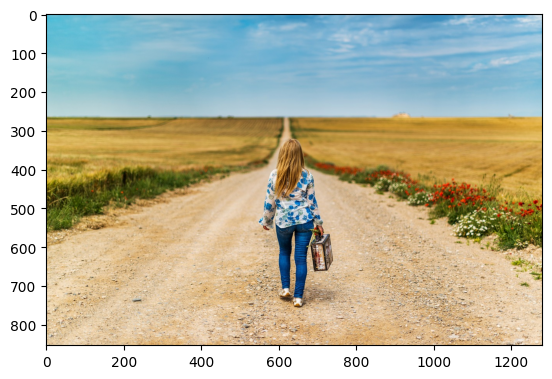

In [ ]:
#@title 画像データの読み込み

img = cv2.imread(test_pic)
plt.imshow(img[:,:,::-1])
plt.show()

In [ ]:
#@title 画像データの形状を取得

h = img.shape[0]
print(f'高さ: {h}')
w = img.shape[1]
print(f'幅: {w}')

shape = img.shape
print(f'画像の形状: {shape}')
size = img.size
print(f'合計画素数: {size}')
dtype = img.dtype
print(f'データ型: {dtype}')

高さ：　854
幅：　1280
画像の形状：　(854, 1280, 3)
合計画素数：　3279360
データ型：　uint8


# 画像データの編集

In [ ]:
#@title 画像データのコピー

annotated_img = img.copy()  # 元のimgに影響しないようにコピーします

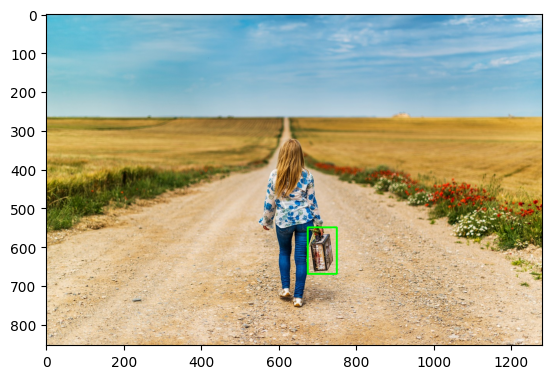

In [ ]:
#@title 矩形の書き込み

"""
cv2.rectangle(image, start_point, end_point, color, thickness)
パラメータの説明：

image: 描画対象の画像（NumPy配列）
start_point: 矩形の左上の座標を(x, y)のタプルで指定
end_point: 矩形の右下の座標を(x, y)のタプルで指定
color: 矩形の色をBGR形式で指定（例：(0,255,0)は緑色）
thickness: 線の太さ（ピクセル単位）。-1を指定すると塗りつぶし
"""
left_top = (675, 550)
right_bottom = (750, 670)

cv2.rectangle(annotated_img, left_top, right_bottom, (0,255,0), 3)
plt.imshow(annotated_img[:,:,::-1])
plt.show()

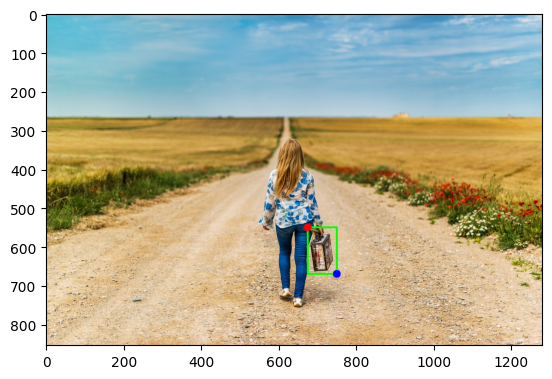

In [ ]:
#@title 円の書き込み

"""
cv2.circle(image, center, radius, color, thickness)
パラメータの説明：

image: 描画する対象の画像
center: 円の中心座標を(x, y)のタプルで指定
radius: 円の半径（ピクセル単位）
color: BGR形式での色指定
thickness: 線の太さ。-1を指定すると円が塗りつぶされる
"""
cv2.circle(annotated_img, left_top, 10, (0,0,255), -1)
cv2.circle(annotated_img, right_bottom, 10, (255,0,0), -1)
plt.imshow(annotated_img[:,:,::-1])
plt.show()

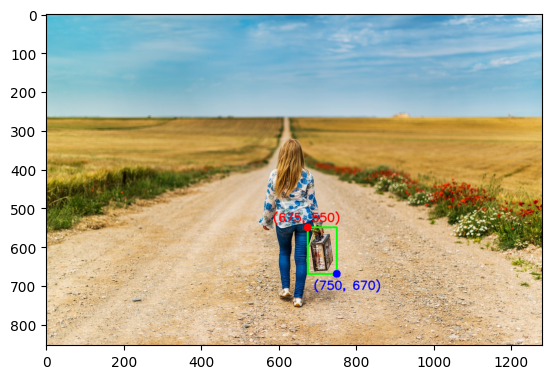

In [ ]:
#@title 文字の書き込み

"""
cv2.putText(image, text, org, font, font_scale, color, thickness, line_type)
パラメータの説明：

image: 描画対象の画像（NumPy配列）
text: 書き込む文字列
org: テキストの左下の座標を(x, y)のタプルで指定
font: フォントの種類（例：cv2.FONT_HERSHEY_SIMPLEX）
font_scale: フォントの大きさ（1.0を基準とした倍率）
color: 文字の色をBGR形式で指定（例：(0,0,255)は赤色）
thickness: 文字の線の太さ（ピクセル単位）
line_type: 線の種類（cv2.LINE_AAを指定すると滑らかな描画）
"""
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(annotated_img, str(left_top),
            (left_top[0]-90,left_top[1]-15),
            font, 1,
            (0,0,255),
            2,
            cv2.LINE_AA)

cv2.putText(annotated_img, str(right_bottom),
            (right_bottom[0]-60,right_bottom[1]+40),
            font, 1,
            (255,0,0),
            2,
            cv2.LINE_AA)


plt.imshow(annotated_img[:,:,::-1])
plt.show()

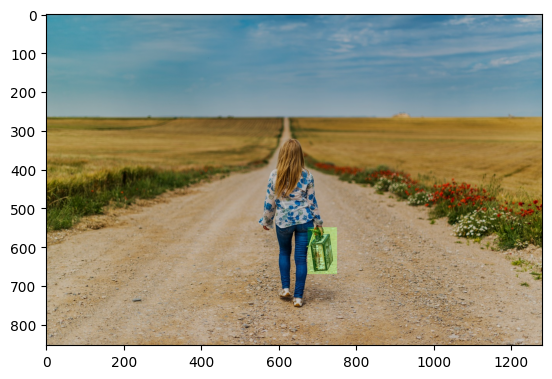

In [ ]:
#@title 透過図形の書き込み

# オーバーレイ用の透明レイヤーを作成（元画像と同じサイズの黒画像）
overlay_layer = np.zeros(img.shape, np.uint8)

# 透明レイヤーに緑色の長方形を描画（塗りつぶし）
cv2.rectangle(overlay_layer, left_top, right_bottom, (0,255,0), -1)

# 元画像:オーバーレイ = 0.8:0.2 の比率で合成
superimposed_img = (img * 0.8 + overlay_layer * 0.2).astype(np.uint8)

plt.imshow(superimposed_img[:,:,::-1])
plt.show()